# Practical Assignment 4 - Topic Modeling
#### Image Adhikari
#### Roll No.: 02

___
### Latent Dirichlet allocation 

LDA belongs to a class of models that are called generative models as they have a sort of fable explains how the data was generated. This generative story is a simplification of reality, of course, to make machine learning easier. In the LDA fable, we first create topics by assigning probability weights to words. Each topic will assign different weights to different words. For example, a Python topic will assign high probability to the word variable and a low probability to the word inebriated. When we wish to generate a new document, we first choose the topics it will use and then mix words from these topics.

In [ ]:
import gensim
from gensim import corpora, models

import matplotlib.pyplot as plt
import numpy as np
from os import path

%matplotlib inline

In [ ]:
if not path.exists('./data/ap/ap.dat'):
    print('Error: Expected data to be present at data/ap/')
    print('Please cd into ./data & run ./download_ap.sh')

In [ ]:
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt') 

In [ ]:
model = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word) 

In [ ]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(12, 0.034928896), (15, 0.010486593), (22, 0.04037022), (26, 0.16618496), (52, 0.13066302), (66, 0.021857135), (77, 0.128898), (90, 0.040123582), (91, 0.3134751), (93, 0.08777012), (95, 0.017570421)]


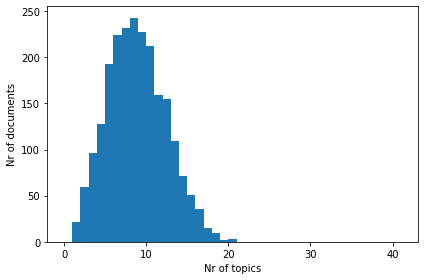

In [ ]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()

In [ ]:
model1 = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word,
    alpha=1.0)

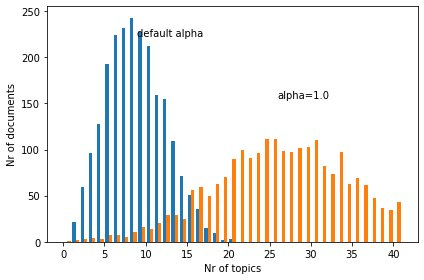

In [ ]:
num_topics_used1 = [len(model1[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()

### Exploring the topic model

In [ ]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(4, 0.011778927), (5, 0.010268332), (9, 0.03256734), (13, 0.011842839), (15, 0.010629991), (17, 0.010790529), (23, 0.030265944), (30, 0.010990861), (40, 0.010830863), (43, 0.011283144), (48, 0.011301336), (62, 0.01258811), (64, 0.010421023), (66, 0.010573771), (68, 0.01694041), (69, 0.028494678), (71, 0.01841352), (78, 0.016254975), (81, 0.0136776), (82, 0.039866325), (83, 0.017483877), (87, 0.011920616), (89, 0.04418247), (91, 0.010730715), (92, 0.010229286), (98, 0.0103388205)]


In [ ]:
from gensim import matutils
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [ ]:
words = model.show_topic(max_topic, 64)

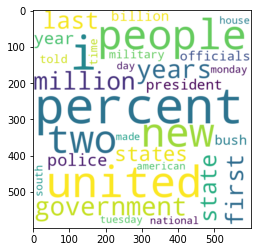

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color='white',
    max_words=30,
    width=600,
    height=600)
wc = wc.generate_from_frequencies(dict(words))


fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

### Comparing documents by topic

In [ ]:
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()
words = model.show_topic(max_topic, 64)

In [ ]:
from scipy.spatial import distance
distances = distance.squareform(distance.pdist(topics)) 

In [ ]:
for ti in range(len(topics)):
 distances[ti,ti] = np.inf

In [ ]:
def closest_to(doc_id):
 return distances[doc_id].argmin() 

In [ ]:
closest_to(1)

42

### Modeling the whole of Wikipedia

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
id2word = gensim.corpora.Dictionary.load_from_text(
'./data/wiki_en_output_wordids.txt')
#mm = gensim.corpora.MmCorpus('./data/wiki_en_output_tfidf.mm') 

In [ ]:
# model = gensim.models.ldamodel.LdaModel(
#  corpus=mm,
#  id2word=id2word,
#  num_topics=100,
#     update_every=1,
#     chunksize=10000,
#     passes=1) 

In [ ]:
# model.save('wiki_lda.pkl')

In [ ]:
# topics = np.zeros((len(mm), model.num_topics))
# for di,doc in enumerate(mm):
#     doc_top = model1[doc]
#     for ti,tv in doc_top:
#         topics[di,ti] += tv
# np.save('topics.npy', topics)

In [ ]:
model1 = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl') 
topics = np.load('topics.npy', mmap_mode='r')

2022-08-03 18:18:31,163 : INFO : loading LdaModel object from wiki_lda.pkl
2022-08-03 18:18:31,164 : INFO : loading expElogbeta from wiki_lda.pkl.expElogbeta.npy with mmap=None
2022-08-03 18:18:31,181 : INFO : setting ignored attribute state to None
2022-08-03 18:18:31,182 : INFO : setting ignored attribute dispatcher to None
2022-08-03 18:18:31,183 : INFO : setting ignored attribute id2word to None
2022-08-03 18:18:31,183 : INFO : LdaModel lifecycle event {'fname': 'wiki_lda.pkl', 'datetime': '2022-08-03T18:18:31.183763', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'loaded'}
2022-08-03 18:18:31,184 : INFO : loading LdaState object from wiki_lda.pkl.state
2022-08-03 18:18:31,201 : INFO : LdaState lifecycle event {'fname': 'wiki_lda.pkl.state', 'datetime': '2022-08-03T18:18:31.201763', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'pla

In [ ]:
lens = (topics > 0).sum(axis=1)
print('Mean number of topics mentioned: {0:.4}'.format(np.mean(lens)))
print('Percentage of articles mentioning <10 topics: {0:.1%}'.format(
 np.mean(lens <= 10))) 

Mean number of topics mentioned: 3.46
Percentage of articles mentioning <10 topics: 100.0%


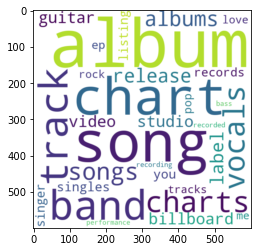

In [ ]:
weights = topics.sum(axis=0)
words = model1.show_topic(weights.argmax(), 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))

fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

In [ ]:
fraction_mention = np.mean(topics[:,weights.argmax()] > 0)
print("The most mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmax()])
print("It represents {:.1%} of the total number of words.".format(total_weight))

The most mentioned topics is mentioned in 8.4% of documents.
It represents 4.3% of the total number of words.


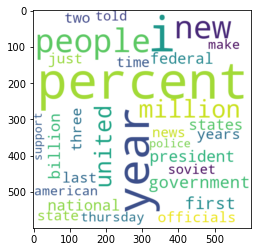

In [ ]:
words = model.show_topic(weights.argmin(), 64)

wc = WordCloud(background_color='white', max_words=30, width=600, height=600)
wc = wc.generate_from_frequencies(dict(words))
fig,ax = plt.subplots()

ax.imshow(wc, interpolation="bilinear")

In [ ]:
fraction_mention = np.mean(topics[:,weights.argmin()] > 0)
print("The least mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmin()])
print("It represents {:.1%} of the total number of words.".format(total_weight))

The least mentioned topics is mentioned in 0.7% of documents.
It represents 0.0% of the total number of words.
